# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Análisis del Comportamiento de Usuario y Test A/A/B en App de Productos Alimenticios
## Evaluamos el embudo de ventas y el impacto del nuevo diseño en las conversiones de usuario.

In [1]:
# Cargamos las librerias necesarias
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth

### Paso 1. Abrir el archivo de datos y leer la información general

In [2]:
# Cargamos los datos y los convertimos a un df
df_logs = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
print(df_logs.head(5))

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Muy bien iniciado el proyecto! La carga de librerías y la lectura del archivo están correctamente implementadas. Esta base te permitirá trabajar con confianza en las siguientes etapas del análisis.  
</div>


### Paso 2. Preparar los datos para el análisis

In [3]:
# Renombramos el nombre de las columnas
df_logs.columns = ['event_name', 'device_id', 'event_timestamp', 'exp_id']

# Comprobamos el tipo de datos y los valores ausentes
df_logs.info()
missing_values = df_logs.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id        244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
event_name         0
device_id          0
event_timestamp    0
exp_id             0
dtype: int64


In [4]:
# Convertimos el timestamp a formato datetime y creamos la columna
df_logs['event_datetime'] = pd.to_datetime(df_logs['event_timestamp'], unit='s')

# Creamos una columna separada por la fecha
df_logs['event_date'] = df_logs['event_datetime'].dt.date

df_logs.head()

,event_name,device_id,event_timestamp,exp_id,event_datetime,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - ¡Buen trabajo en la preparación de los datos! Renombraste las columnas con claridad, verificaste la integridad del dataset y transformaste correctamente las marcas de tiempo. Esto establece una base sólida para los análisis posteriores.  
</div>


### Paso 3. Estudiar y comprobar los datos

In [5]:
# ¿Cuántos eventos hay en los registros?
total_events = len(df_logs)

# ¿Cuántos usuarios hay en los registros?
unique_users = df_logs['device_id'].nunique()

# ¿Cuál es el promedio de eventos por usuario?
avg_events_per_user = round(total_events / unique_users, 2)

print('cantidad total de eventos:', total_events)
print('cantidad total de usuarios:', unique_users)
print('promedio de eventos por usuario', avg_events_per_user)

cantidad total de eventos: 244126
cantidad total de usuarios: 7551
promedio de eventos por usuario 32.33


fecha minima: 2019-07-25 04:43:36
fecha máxima: 2019-08-07 21:15:17


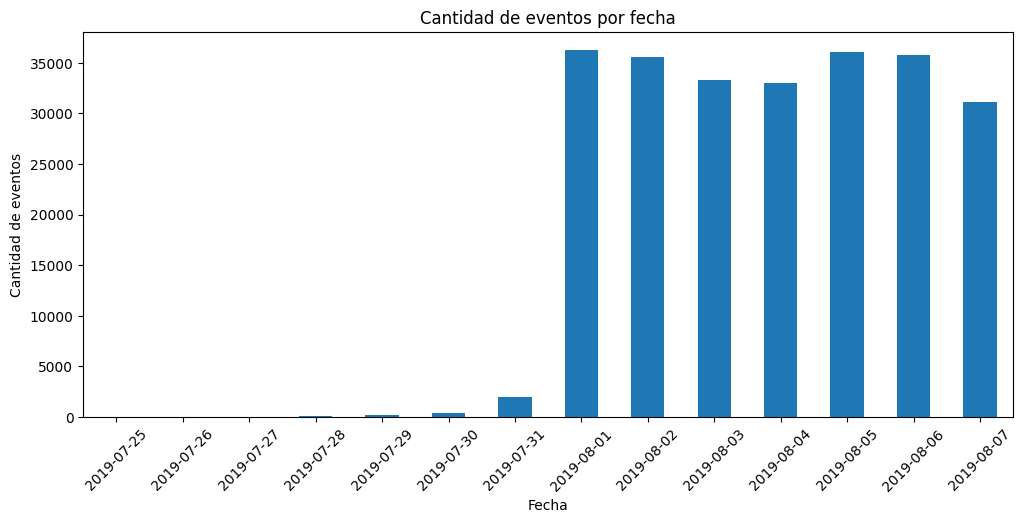

2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
Name: event_date, dtype: int64


In [6]:
# Qué periodo de tiempo cubren los datos
# Buscamos las fechas mínima y máxima
min_date = df_logs['event_datetime'].min()
max_date = df_logs['event_datetime'].max()
print('fecha minima:', min_date)
print('fecha máxima:', max_date)

# Trazamos un histograma por fecha y hora
events_per_day = df_logs['event_date'].value_counts().sort_index()
plt.figure(figsize=(12,5))
events_per_day.plot(kind='bar')
plt.title('Cantidad de eventos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=45)
plt.show()

print(events_per_day)

Como se puede observar del 25 al 30 de julio se tienen muy pocos eventos (menos de 500 al día), lo cual puede sugerir que los datos no se encuentren completos.

A partir del 31 de julio, los eventos aumentan de manera significativa y se estabilizan en alrededor de 30,000 por día. Por lo tanto vamos a considerar como periodo real de análisis del 31 de julio al 7 de agosto de 2019.

In [7]:
# ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
# Filtramos los eventos por el periodo del 31 de julio al 7 de agosto
filtered_logs = df_logs[df_logs['event_date'] >= date(2019, 7, 31)]

# Realizamos conteos con los datos filtrados
filtered_event_count = len(filtered_logs)
filtered_user_count = filtered_logs['device_id'].nunique()

# Calculamos las perdidas de datos
events_lost = total_events - filtered_event_count
users_lost = unique_users - filtered_user_count
percent_events_lost = round(events_lost/total_events * 100, 2)
percent_users_lost = round(users_lost/unique_users * 100, 2)

print('Eventos eliminados:', events_lost)
print('Porcentaje de eventos eliminados:', percent_events_lost)
print('Usuarios eliminados:', users_lost)
print('Porcentaje de usuarios eliminados:', percent_users_lost)

Eventos eliminados: 797
Porcentaje de eventos eliminados: 0.33
Usuarios eliminados: 9
Porcentaje de usuarios eliminados: 0.12


Podemos observar que no se perdieron muchos datos al filtrar las fechas para el análisis. Tan sólo un .33% de los eventos fueron eliminados, sólo .12% de los usuarios fueron eliminados por lo que podemos concluir que la limpieza es segura y no distorsiona el análisis general.

In [27]:
# Asegúrate de tener usuarios de los tres grupos experimentales.
users_by_groups = filtered_logs.groupby('exp_id')['device_id'].nunique().reset_index()
users_by_groups.columns = ['exp_id', 'usuarios_únicos']
print(users_by_groups)

   exp_id  usuarios_únicos
0     246             2485
1     247             2517
2     248             2540


Con esto podemos concluir que nos aseguramos tenemos usuarios de los 3 grupos experimentales. Cabe mencionar también que la distribución es bantante equilibrada, lo cuál es ideal para el análisis test A/A/B.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy clara y fundamentada tu validación de los datos. Justificaste con precisión el periodo de análisis y cuantificaste correctamente el impacto del filtrado. La verificación del equilibrio entre grupos fue un excelente paso adicional.  
</div>


### Paso 4. Estudiar el embudo de eventos

In [28]:
# Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
event_frequency = filtered_logs['event_name'].value_counts().reset_index()
event_frequency.columns = ['event_name', 'frequency']
print(event_frequency)

                event_name  frequency
0         MainScreenAppear     118681
1       OffersScreenAppear      46724
2         CartScreenAppear      42623
3  PaymentScreenSuccessful      34253
4                 Tutorial       1048


In [29]:
# Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. 
# Ordena los eventos por el número de usuarios.
users_per_event = filtered_logs.groupby('event_name')['device_id'].nunique().reset_index()
users_per_event.columns = ['event_name', 'usuarios_únicos']
users_per_event = users_per_event.sort_values(by='usuarios_únicos', ascending=False)
print(users_per_event)

                event_name  usuarios_únicos
1         MainScreenAppear             7429
2       OffersScreenAppear             4606
0         CartScreenAppear             3742
3  PaymentScreenSuccessful             3542
4                 Tutorial              845


In [47]:
# Calcula la proporción de usuarios que realizaron la acción al menos una vez.
# Calculamos la cantidad de usuarios únicos en el dataset filtrado
total_unique_users = filtered_logs['device_id'].nunique()

# Calculamos la proporción de usuarios por eventos
users_per_event['proporción'] = (users_per_event['usuarios_únicos']/total_unique_users).round(2)
print(users_per_event)

                event_name  usuarios_únicos  proporción
1         MainScreenAppear             7429        0.99
2       OffersScreenAppear             4606        0.61
0         CartScreenAppear             3742        0.50
3  PaymentScreenSuccessful             3542        0.47
4                 Tutorial              845        0.11


### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

Orden lógico de eventos:
- 1.- MainScreenAppear (El usuario abre la app en la pantalla principal)
- 2.- OffersScreenAppear (El usuario visualiza promociones o productos disponibles)
- 3.- CartsScreenAppear (El usuario agrega y revisa productos agregados al carrito)
- 4.- PaymentsScreenSuccessful (Se completa la orden ya que el pago se realizó con éxito)
- 5.- Tutorial (Este paso posiblemente solo se muestra a usuario nuevos, por lo que consideramos no necesariamente forma parte de la secuencia)


In [31]:
# Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una 
# etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, 
# calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y 
# la proporción de usuarios en la etapa C a la cantidad en la etapa B.

# Primero utilizaremos el metodo pivot_table() para buscar la hora del primer suceso de cada evento

users = filtered_logs.pivot_table(
    index='device_id',
    columns= 'event_name',
    values='event_datetime',
    aggfunc='min'
)

# Creamos variables para cada etapa del embudo comparando timestamps de cada paso
step_1 = ~users['MainScreenAppear'].isna()
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

# Obtenemos el número de filas por cada paso
n_mainscreenappear = users[step_1].shape[0] 
n_offersscreenappear = users[step_2].shape[0]
n_cartscreenappear = users[step_3].shape[0]
n_paymentscreensuccessful = users[step_4].shape[0]

print('Visitantes:', n_mainscreenappear)
print('Visitaron ofertas:', n_offersscreenappear)
print('Agregaron a su carrito: ', n_cartscreenappear)
print('Realizaron pago:', n_paymentscreensuccessful)

Visitantes: 7429
Visitaron ofertas: 4116
Agregaron a su carrito:  1672
Realizaron pago: 453


In [32]:
# ¿En qué etapa pierdes más usuarios?
MainScreen_Offers = n_mainscreenappear - n_offersscreenappear
Offers_Cart = n_offersscreenappear - n_cartscreenappear
Cart_Payment = n_cartscreenappear - n_paymentscreensuccessful

print(MainScreen_Offers, 'usuarios perdidos en segunda etapa')
print(Offers_Cart, 'usuarios perdidos en tercera etapa')
print(Cart_Payment, 'usuarios perdidos en cuarta etapa')

3313 usuarios perdidos en segunda etapa
2444 usuarios perdidos en tercera etapa
1219 usuarios perdidos en cuarta etapa


La mayor pérdida de usuarios ocurre entre la pantalla principal (Paso 1) y la pantalla para ver las ofertas (Paso 2) con 3313 usuarios.

In [49]:
# ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?
usuarios_finales = (n_paymentscreensuccessful/n_mainscreenappear) * 100
usuarios_finales = round(usuarios_finales, 2)
print('Usuarios que completaron el viaje:', usuarios_finales, '%')

Usuarios que completaron el viaje: 6.1 %


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente análisis del embudo de conversión. El orden lógico de eventos está bien justificado, y los cálculos paso a paso permiten entender claramente dónde se produce la mayor pérdida de usuarios. El enfoque secuencial con timestamps está muy bien aplicado.  
</div>



### Paso 5. Estudiar los resultados del experimento

In [34]:
# 1. ¿Cuántos usuarios hay en cada grupo?
# Imprimos la variable user_by_groups que tenemos arriba para mostrar la cantidad de usuarios por grupo
print(users_by_groups)

   exp_id  usuarios_únicos
0     246             2485
1     247             2517
2     248             2540


In [35]:
# 2. Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. 
# Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

# Para determinar la diferencia estadística vamos a calcular la proporción de éxito de ambos grupos
# Filtramos los usuarios por cada grupo
grupo_246 = filtered_logs[filtered_logs['exp_id'] == 246]
grupo_247 = filtered_logs[filtered_logs['exp_id'] == 247]

# Calculamos la cantidad de usuarios que realizaron pagos por cada grupo, la cantidad de usuarios únicos por grupo ya los tenemos por ejercicio anterior
pagos_246 = grupo_246[grupo_246['event_name'] == 'PaymentScreenSuccessful']['device_id'].nunique()
pagos_247 = grupo_247[grupo_247['event_name'] == 'PaymentScreenSuccessful']['device_id'].nunique()

print('Usuarios que realizaron pagos del grupo 246:', pagos_246)
print('Usuarios que realizaron pagos del grupo 247:', pagos_247)

Usuarios que realizaron pagos del grupo 246: 1200
Usuarios que realizaron pagos del grupo 247: 1159


In [36]:
alpha = .05 # Nivel de significancia

successes = np.array([1200, 1159])
trials = np.array([2485, 2517])

# proporción de éxito en el grupo 246
p1 = successes[0]/trials[0]

# proporción de éxito en el grupo 247
p2 = successes[1]/trials[1]

# proporción de éxito en el dataset unido
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# diferencia entre las proporciones de los datasets
difference = p1 - p2

# Calculamos la estadística en desviaciones estándar de la distribución normal estándar
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# Establecemos la distribución normal estándar (media 0, desviación estándar 1)
disrt = st.norm(0,1)

# Dado que la distribución es normal, buscamos el valor absoluto estadístico utilizando cdf() y abs()
# Multiplicamos el valor p por 2 para tener en cuenta ambos colas de la distribución normal
p_value = (1 - disrt.cdf(abs(z_value))) * 2

print('p_value: ', p_value)

if (p_value < alpha):
    print('Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones')
else:
    print('No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes')

p_value:  0.11210845100173072
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes


In [37]:
# 3. Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios 
# que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es 
# estadísticamente significativa. Repite el procedimiento para todos los demás eventos
# (ahorrarás tiempo si creas una función especial para esta prueba). 
# ¿Puedes confirmar que los grupos se dividieron correctamente?

# Buscamos los eventos mas populares en los grupos de control 246 y 247
events_246 = grupo_246.groupby('event_name')['device_id'].nunique().reset_index()
events_246.columns = ['event_name', 'usuarios_únicos']
events_246 = events_246.sort_values(by='usuarios_únicos', ascending=False)

events_247 = grupo_247.groupby('event_name')['device_id'].nunique().reset_index()
events_247.columns = ['event_name', 'usuarios_únicos']
events_247 = events_247.sort_values(by='usuarios_únicos', ascending=False)
merged_events = events_246.merge(events_247, on='event_name', suffixes=('_246', '_247'))

print(merged_events)
print('Podemos observar que el evento más popular para ambos grupos es MainScreenAppear')

                event_name  usuarios_únicos_246  usuarios_únicos_247
0         MainScreenAppear                 2452                 2479
1       OffersScreenAppear                 1544                 1526
2         CartScreenAppear                 1267                 1239
3  PaymentScreenSuccessful                 1200                 1159
4                 Tutorial                  278                  285
Podemos observar que el evento más popular para ambos grupos es MainScreenAppear


In [38]:
# Definimos una función para verificar la diferencia significativa entre los 2 grupos
def comparar_eventos(evento, grupo1, grupo2, nombre_evento):
    exito_1 = grupo1[grupo1['event_name'] == evento]['device_id'].nunique() # contamos usuarios de un evento en especifico del grupo 1
    exito_2 = grupo2[grupo2['event_name'] == evento]['device_id'].nunique() # contamos usuarios de un evento en especifico del grupo 2
    total_1 = grupo1['device_id'].nunique() # contamos el total de usuario del grupo 1
    total_2 = grupo2['device_id'].nunique() # contamos el total de usuario del grupo 2
    p1 = exito_1/total_1 # calculamos proporciones por grupo
    p2 = exito_2/total_2 # calculamos proporciones por grupo
    p_combined = (exito_1 + exito_2)/(total_1 + total_2) # cálculo proporción combinada
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_1 + 1/total_2))
    disrt = st.norm(0,1)
    p_value = (1 - disrt.cdf(abs(z_value))) * 2 # Calculamos el valor p
    return {
        'Evento': nombre_evento,
        'Usuarios grupo 246': total_1,
        'Usuarios grupo 247': total_2,
        'Realizaron evento 246': exito_1,
        'Realizaron evento 247': exito_2,
        'Proporción 246': round(p1, 3),
        'Proporción 247': round(p2, 3),
        'p_value': round(p_value, 3),
        'Diferencia significativa ?': 'Si' if p_value < 0.05 else 'No'
    }

eventos_unicos = filtered_logs['event_name'].unique()

# Usamos la función para calcular las proporciones y los agregamos a una nueva lista
resultados = []

# Utilizamos un for para que la función se realice por todos los eventos
for evento in eventos_unicos:
    resultado = comparar_eventos(evento, grupo_246, grupo_247, evento) # Utilizamos la función
    resultados.append(resultado) # Lo agregamos a lista resultados

# Convertimos la información a un dataframe para mostrar
df_resultados = pd.DataFrame(resultados)
print(df_resultados[['Evento', 'Proporción 246', 'Proporción 247', 'p_value', 'Diferencia significativa ?']])

                    Evento  Proporción 246  Proporción 247  p_value  \
0         MainScreenAppear           0.987           0.985    0.587   
1       OffersScreenAppear           0.621           0.606    0.274   
2                 Tutorial           0.112           0.113    0.879   
3  PaymentScreenSuccessful           0.483           0.460    0.112   
4         CartScreenAppear           0.510           0.492    0.213   

  Diferencia significativa ?  
0                         No  
1                         No  
2                         No  
3                         No  
4                         No  


Podemos observar que para todos los eventos no existe una diferencia estadísticamente significativa de usuarios, esto nos dice que la división de usuarios entre los grupos es correcta.

In [39]:
# 4. Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de 
# los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados 
# combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

# Creamos el filtrado por el grupo 248 y por los resultados combinados de los grupos de control
grupo_248 = filtered_logs[filtered_logs['exp_id'] == 248]
grupo_control_combinado = pd.concat([grupo_246, grupo_247])

# Utilizamos la función creada previamente pero agregamos 2 parámetros mas
def comparar_eventos(evento, grupo1, grupo2, nombre_evento, etiqueta1, etiqueta2):
    exito_1 = grupo1[grupo1['event_name'] == evento]['device_id'].nunique() # contamos usuarios de un evento en especifico del grupo 1
    exito_2 = grupo2[grupo2['event_name'] == evento]['device_id'].nunique() # contamos usuarios de un evento en especifico del grupo 2
    total_1 = grupo1['device_id'].nunique() # contamos el total de usuario del grupo 1
    total_2 = grupo2['device_id'].nunique() # contamos el total de usuario del grupo 2
    p1 = exito_1/total_1 # calculamos proporciones por grupo
    p2 = exito_2/total_2 # calculamos proporciones por grupo
    p_combined = (exito_1 + exito_2)/(total_1 + total_2) 
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_1 + 1/total_2))
    disrt = st.norm(0,1)
    p_value = (1 - disrt.cdf(abs(z_value))) * 2
    return {
        'Evento': nombre_evento,
        f'Proporción {etiqueta1}': round(p1, 3),
        f'Proporción {etiqueta2}': round(p2, 3),
        'p_value': round(p_value, 3),
        'Diferencia significativa ?': 'Si' if p_value < 0.05 else 'No'
    }
    
# Hacemos las comparaciones
resultados_vs_246 = [comparar_eventos(evento, grupo_248, grupo_246, evento, '248', '246') for evento in eventos_unicos]
resultados_vs_247 = [comparar_eventos(evento, grupo_248, grupo_247, evento, '248', '247') for evento in eventos_unicos]
resultados_vs_comb = [comparar_eventos(evento, grupo_248, grupo_control_combinado, evento, '248', 'grupo combinado') for evento in eventos_unicos]

df_resultados_246 = pd.DataFrame(resultados_vs_246)
df_resultados_247 = pd.DataFrame(resultados_vs_247)
df_resultados_comb = pd.DataFrame(resultados_vs_comb)

print(df_resultados_246)
print('No existe diferencia significativa entre el grupo de control 246 y el grupo 248')

                    Evento  Proporción 248  Proporción 246  p_value  \
0         MainScreenAppear           0.983           0.987    0.341   
1       OffersScreenAppear           0.605           0.621    0.227   
2                 Tutorial           0.111           0.112    0.924   
3  PaymentScreenSuccessful           0.466           0.483    0.224   
4         CartScreenAppear           0.487           0.510    0.099   

  Diferencia significativa ?  
0                         No  
1                         No  
2                         No  
3                         No  
4                         No  
No existe diferencia significativa entre el grupo de control 246 y el grupo 248


In [40]:
print(df_resultados_247)
print('No existe diferencia significativa entre el grupo de control 247 y el grupo 248')

                    Evento  Proporción 248  Proporción 247  p_value  \
0         MainScreenAppear           0.983           0.985    0.682   
1       OffersScreenAppear           0.605           0.606    0.910   
2                 Tutorial           0.111           0.113    0.804   
3  PaymentScreenSuccessful           0.466           0.460    0.707   
4         CartScreenAppear           0.487           0.492    0.688   

  Diferencia significativa ?  
0                         No  
1                         No  
2                         No  
3                         No  
4                         No  
No existe diferencia significativa entre el grupo de control 247 y el grupo 248


In [41]:
print(df_resultados_comb)
print('No existe diferencia significativa entre el grupo de control combinado y el grupo 248')

                    Evento  Proporción 248  Proporción grupo combinado  \
0         MainScreenAppear           0.983                       0.986   
1       OffersScreenAppear           0.605                       0.614   
2                 Tutorial           0.111                       0.113   
3  PaymentScreenSuccessful           0.466                       0.472   
4         CartScreenAppear           0.487                       0.501   

   p_value Diferencia significativa ?  
0    0.429                         No  
1    0.447                         No  
2    0.842                         No  
3    0.630                         No  
4    0.238                         No  
No existe diferencia significativa entre el grupo de control combinado y el grupo 248


In [42]:
# 5. ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? 
# Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia 
# estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? 
# Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

# Utilizaremos el método de Bonferroni para calcular el nivel de significancia
# Consideramos un total de 15 pruebas ya que comparamos 5 eventos por 3 grupo (246, 247 y grupo combinado)
n_pruebas = len(df_resultados_246) + len(df_resultados_247) + len(df_resultados_comb)
alpha_bonferroni = round(0.05 / n_pruebas, 4)
print(alpha_bonferroni)


0.0033


In [43]:
# Modificamos la función y volvemos a realizar comparaciones
def comparar_eventos_bonferroni(evento, grupo1, grupo2, nombre_evento, etiqueta1, etiqueta2):
    exito_1 = grupo1[grupo1['event_name'] == evento]['device_id'].nunique() # contamos usuarios de un evento en especifico del grupo 1
    exito_2 = grupo2[grupo2['event_name'] == evento]['device_id'].nunique() # contamos usuarios de un evento en especifico del grupo 2
    total_1 = grupo1['device_id'].nunique() # contamos el total de usuario del grupo 1
    total_2 = grupo2['device_id'].nunique() # contamos el total de usuario del grupo 2
    p1 = exito_1/total_1 # calculamos proporciones por grupo
    p2 = exito_2/total_2 # calculamos proporciones por grupo
    p_combined = (exito_1 + exito_2)/(total_1 + total_2) 
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_1 + 1/total_2))
    disrt = st.norm(0,1)
    p_value = (1 - disrt.cdf(abs(z_value))) * 2
    return {
        'Evento': nombre_evento,
        f'Proporción {etiqueta1}': round(p1, 3),
        f'Proporción {etiqueta2}': round(p2, 3),
        'p_value': round(p_value, 3),
        'Diferencia significativa ?': 'Si' if p_value < 0.0033 else 'No' # Actualizamos el valor alpha
    }

# Hacemos las comparaciones
resultados_vs_246_bonferroni = [comparar_eventos_bonferroni(evento, grupo_248, grupo_246, evento, '248', '246') for evento in eventos_unicos]
resultados_vs_247_bonferroni = [comparar_eventos_bonferroni(evento, grupo_248, grupo_247, evento, '248', '247') for evento in eventos_unicos]
resultados_vs_comb_bonferroni = [comparar_eventos_bonferroni(evento, grupo_248, grupo_control_combinado, evento, '248', 'grupo combinado') for evento in eventos_unicos]

df_resultados_246_bonferroni = pd.DataFrame(resultados_vs_246_bonferroni)
df_resultados_247_bonferroni = pd.DataFrame(resultados_vs_247_bonferroni)
df_resultados_comb_bonferroni = pd.DataFrame(resultados_vs_comb_bonferroni)

print(df_resultados_246_bonferroni)
print('No existe diferencia significativa entre el grupo de control 246 y el grupo 248 con alpha bonferroni')

                    Evento  Proporción 248  Proporción 246  p_value  \
0         MainScreenAppear           0.983           0.987    0.341   
1       OffersScreenAppear           0.605           0.621    0.227   
2                 Tutorial           0.111           0.112    0.924   
3  PaymentScreenSuccessful           0.466           0.483    0.224   
4         CartScreenAppear           0.487           0.510    0.099   

  Diferencia significativa ?  
0                         No  
1                         No  
2                         No  
3                         No  
4                         No  
No existe diferencia significativa entre el grupo de control 246 y el grupo 248 con alpha bonferroni


In [44]:
print(df_resultados_247_bonferroni)
print('No existe diferencia significativa entre el grupo de control 247 y el grupo 248 con alpha bonferroni')

                    Evento  Proporción 248  Proporción 247  p_value  \
0         MainScreenAppear           0.983           0.985    0.682   
1       OffersScreenAppear           0.605           0.606    0.910   
2                 Tutorial           0.111           0.113    0.804   
3  PaymentScreenSuccessful           0.466           0.460    0.707   
4         CartScreenAppear           0.487           0.492    0.688   

  Diferencia significativa ?  
0                         No  
1                         No  
2                         No  
3                         No  
4                         No  
No existe diferencia significativa entre el grupo de control 247 y el grupo 248 con alpha bonferroni


In [45]:
print(df_resultados_comb)
print('No existe diferencia significativa entre el grupo de control combinado y el grupo 248 con alpha bonferroni')

                    Evento  Proporción 248  Proporción grupo combinado  \
0         MainScreenAppear           0.983                       0.986   
1       OffersScreenAppear           0.605                       0.614   
2                 Tutorial           0.111                       0.113   
3  PaymentScreenSuccessful           0.466                       0.472   
4         CartScreenAppear           0.487                       0.501   

   p_value Diferencia significativa ?  
0    0.429                         No  
1    0.447                         No  
2    0.842                         No  
3    0.630                         No  
4    0.238                         No  
No existe diferencia significativa entre el grupo de control combinado y el grupo 248 con alpha bonferroni


# Interpretación final:

Los tres grupos (control y experimento) se comportaron de forma estadísticamente similar para todos los eventos observados. Esto sugiere que el cambio de fuente en la app no afectó negativamente la experiencia del usuario.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente análisis experimental. Mostraste dominio al estructurar comparaciones entre grupos con rigurosidad estadística, incluyendo ajustes por múltiples pruebas. Tus conclusiones están bien sustentadas y reflejan una interpretación clara de los resultados.  
</div>


## Comentario general del revisor 



<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está <b>aprobado</b>. Has demostrado un excelente manejo del flujo completo de análisis: desde la carga y limpieza de los datos, hasta la validación de hipótesis estadísticas con rigurosidad. Tu trabajo refleja atención al detalle, criterio analítico y un uso muy apropiado de las herramientas estadísticas.  

#### Puntos Positivos:

* **Procesamiento de datos:** Transformación de fechas, renombrado de columnas y filtrado temporal bien ejecutados.
* **Visualización y análisis gráfico:** Uso acertado de histogramas para detectar anomalías en la frecuencia de eventos.
* **Ingeniería de características:** Creación lógica del embudo de eventos con base en secuencia temporal.
* **Comparación de modelos:** Aplicación consistente de pruebas A/A/B con controles estadísticos, incluyendo la corrección de Bonferroni.

#### Áreas para Seguir Investigando:

* **Vectorización y optimización de código:** Explorar `groupby().agg()` con múltiples funciones o el uso de `apply` para reducir ciclos repetitivos.
* **Técnicas avanzadas de feature engineering:** Incorporar variables temporales como el tiempo entre eventos o embudos personalizados por segmento.
* **Evaluación de modelos más complejos:** Analizar conversiones usando modelos de regresión logística para aislar efectos de variables adicionales.
* **Manejo de desbalanceo en los datos:** Aplicar técnicas de muestreo o ajuste por covariables si se trabaja con eventos poco frecuentes.

¡Sigue explorando con curiosidad y profundidad, tu progreso es evidente y muy sólido!

</div>
